<a href="https://colab.research.google.com/github/akhila-attem/Self-projects/blob/main/AWeatherGrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, log_loss
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 

from sklearn.neighbors import KNeighborsRegressor 

from sklearn.svm import SVR #SVM

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import cohen_kappa_score

In [ ]:
data=pd.read_excel("/content/final-weather-data.xlsx")

In [ ]:
data

,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon
0,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723
1,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723
2,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723
3,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723
4,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15852,2021-05-27,39.2,25.2,64,37.0,13.3,0.0,12.2,8.8,20.8,7.8,17.508409,78.2723
15853,2021-05-28,37.8,24.2,81,46.0,13.5,0.0,12.0,7.7,19.8,6.8,17.508409,78.2723
15854,2021-05-29,36.0,25.2,74,46.0,7.9,0.0,12.4,6.2,18.5,5.5,17.508409,78.2723
15855,2021-05-30,38.4,22.6,90,51.0,8.9,1.0,12.6,8.5,20.9,6.0,17.508409,78.2723


In [ ]:
data.drop(['Lat'],axis=1,inplace=True)

In [ ]:
data.drop(['Lon'],axis=1,inplace=True)

In [ ]:
data

,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET
0,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9
1,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9
2,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4
3,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8
4,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1
...,...,...,...,...,...,...,...,...,...,...,...
15852,2021-05-27,39.2,25.2,64,37.0,13.3,0.0,12.2,8.8,20.8,7.8
15853,2021-05-28,37.8,24.2,81,46.0,13.5,0.0,12.0,7.7,19.8,6.8
15854,2021-05-29,36.0,25.2,74,46.0,7.9,0.0,12.4,6.2,18.5,5.5
15855,2021-05-30,38.4,22.6,90,51.0,8.9,1.0,12.6,8.5,20.9,6.0


In [ ]:
data.drop(['Date'],axis=1,inplace=True)


In [ ]:
data.isna().sum()

MaxT         0
MinT         0
RH1          0
RH2          0
Wind         0
Rain         0
SSH          0
Evap         0
Radiation    1
FAO56_ET     0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

MaxT         0
MinT         0
RH1          0
RH2          0
Wind         0
Rain         0
SSH          0
Evap         0
Radiation    0
FAO56_ET     0
dtype: int64

In [ ]:
data.iloc[:,7]
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[28.5  28.8  29.   27.8  27.2  26.5  26.8  28.2  23.5  23.7  25.4  26.3
 28.   27.9  29.1  29.4  29.6  29.8  29.3  27.7  28.9  27.6  29.2  29.9
 30.4  28.7  30.7  31.8  31.6  32.8  31.7  33.   32.5  27.1  30.3  31.4
 31.2  32.4  33.7  33.6  34.8  34.1  33.5  34.5  34.4  32.3  35.9  35.2
 34.6  35.   36.2  37.   36.   36.7  36.9  36.4  37.5  37.2  37.7  36.1
 34.3  35.4  36.8  38.1  38.6  40.5  40.3  40.8  41.1  39.7  37.9  38.
 39.3  38.5  32.6  35.1  38.3  39.   39.5  40.9  41.4  38.7  37.3  39.6
 41.   41.3  40.   38.4  38.2  37.8  35.6  36.3  34.9  34.7  33.2  34.
 30.   25.3  25.9  26.   26.4  30.8  27.5  27.3  27.4  29.5  26.2  30.9
 26.9  28.1  30.2  31.   30.6  28.6  24.8  22.2  27.   28.3  29.7  30.5
 30.1  31.5  32.   31.9  28.4  24.   25.   25.5  32.2  31.3  35.7  36.5
 36.6  37.1  37.4  39.2  37.6  40.4  39.8  39.9  40.1  40.6  41.9  41.5
 24.9  22.5  38.8  39.1  41.6  38.9  24.2  33.1  34.2  26.6  33.4  33.8
 32.1  23.8  32.7  32.9  31.1  23.6  25.7  35.5  35.8  40.2  39.4 

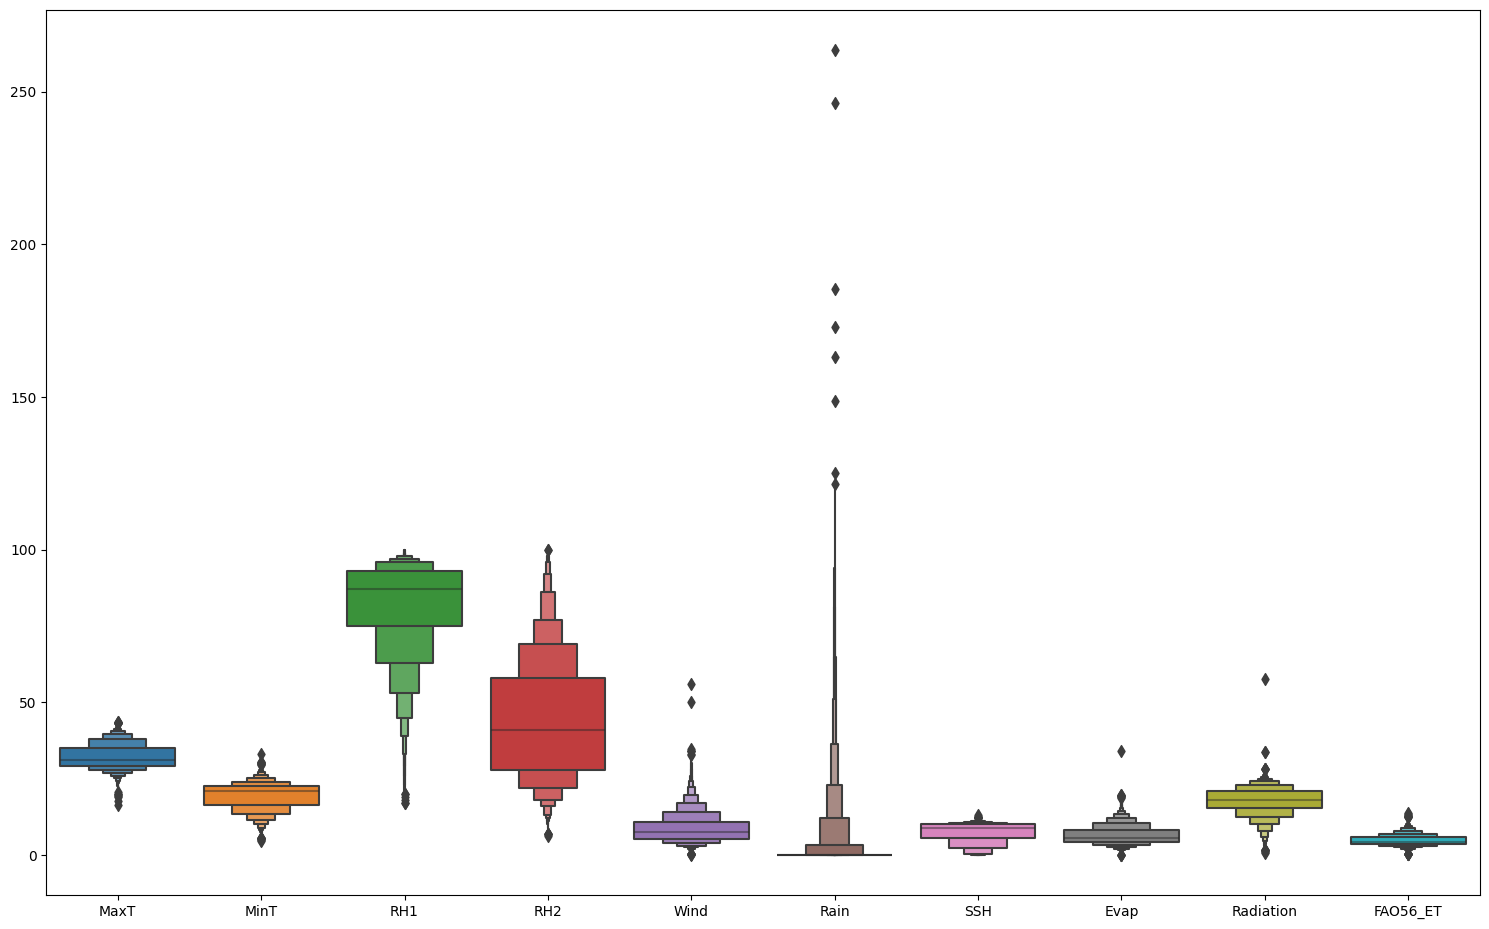

In [ ]:
plt.rcParams["figure.figsize"] = [18.50, 11.50]
out=sns.boxenplot(data=data)

In [ ]:
for x in ['Wind','Rain','Evap','RH2','Radiation']:
    q75,q25 = np.percentile(data.loc[:,x],[85,30])
    intr_qr = q75-q25
 
    max = q75+(3.5*intr_qr)
    min = q25-(3.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [ ]:
data.dropna(inplace=True)

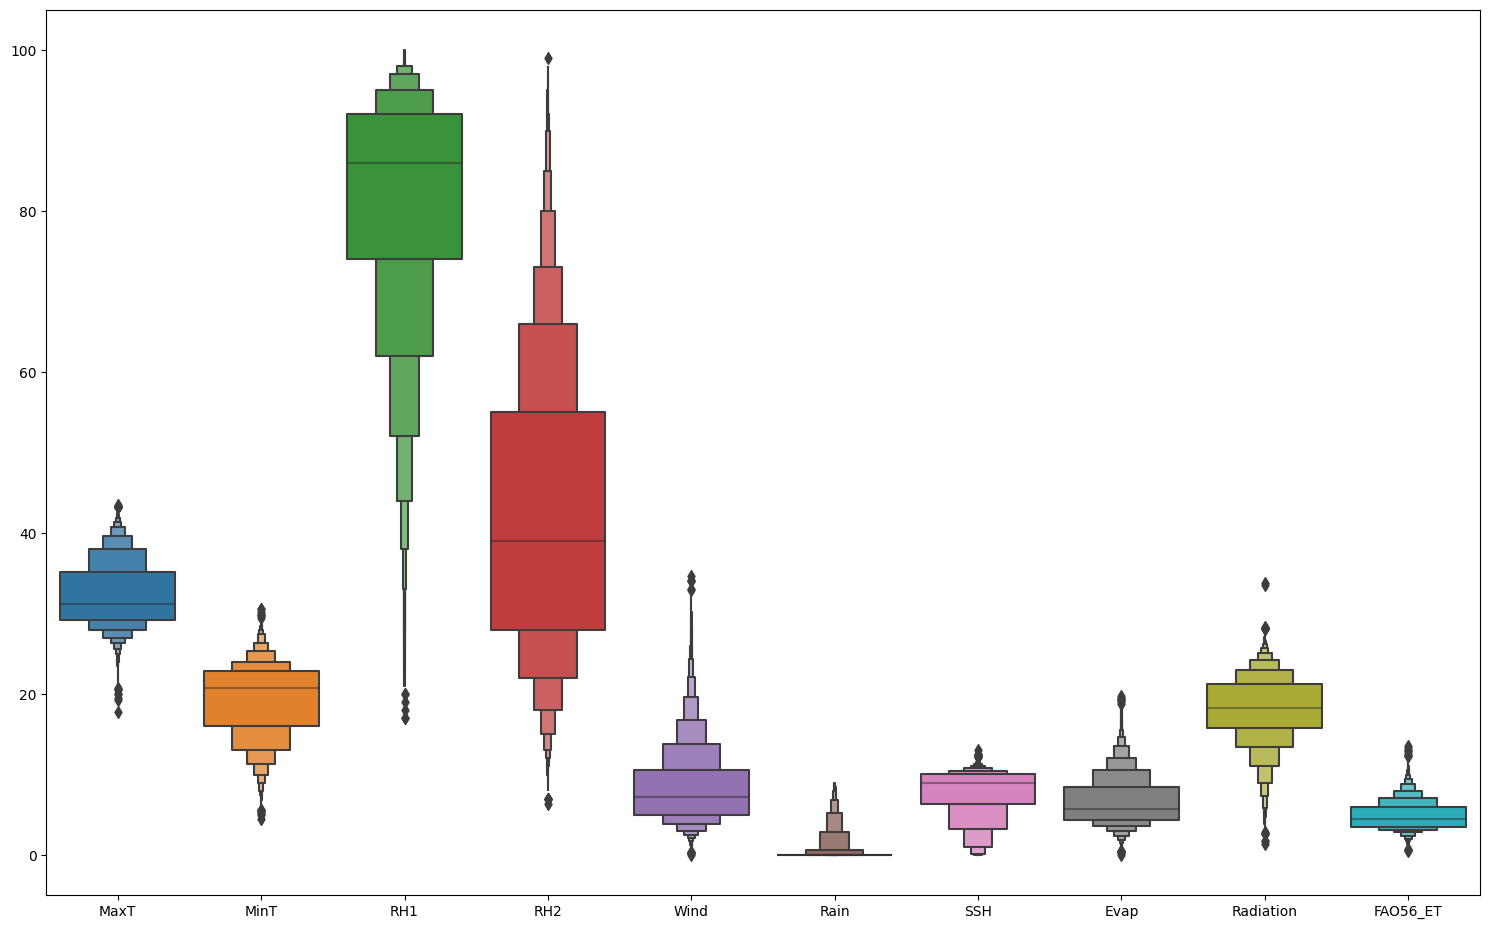

In [ ]:
plt.rcParams["figure.figsize"] = [18.50, 11.50]
out=sns.boxenplot(data=data)

In [ ]:
data

,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET
0,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9
1,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9
2,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4
3,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8
4,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1
...,...,...,...,...,...,...,...,...,...,...
15852,39.2,25.2,64,37.0,13.3,0.0,12.2,8.8,20.8,7.8
15853,37.8,24.2,81,46.0,13.5,0.0,12.0,7.7,19.8,6.8
15854,36.0,25.2,74,46.0,7.9,0.0,12.4,6.2,18.5,5.5
15855,38.4,22.6,90,51.0,8.9,1.0,12.6,8.5,20.9,6.0


#EXPLORATORY DATA ANALYSIS

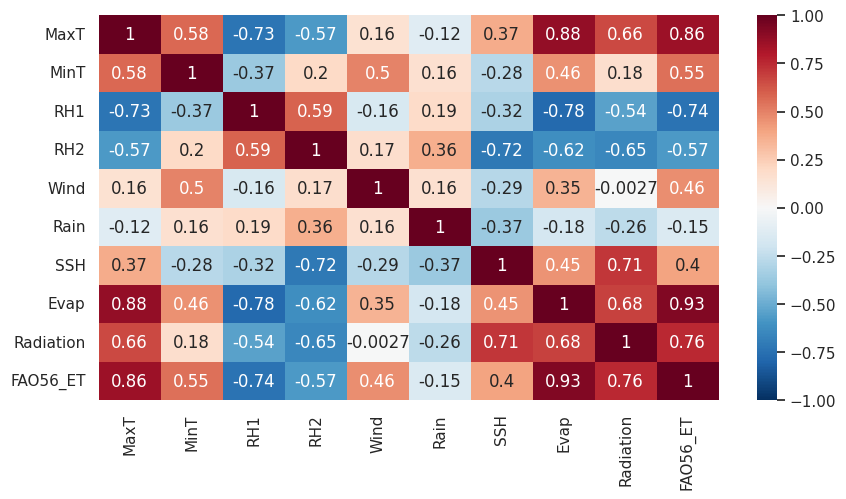

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

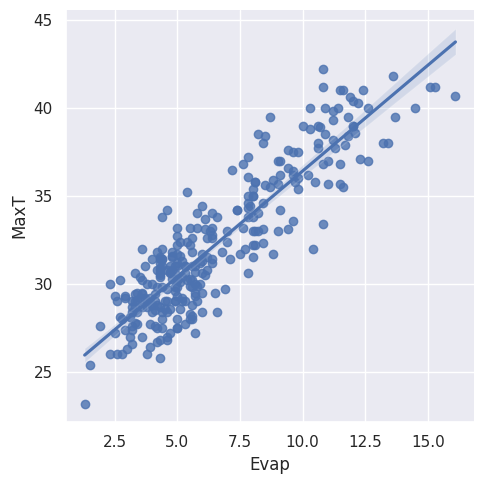

In [ ]:
sns.lmplot(x="Evap", y="MaxT", data=data.sample(300), palette = 'inferno_r', height = 5)

<ipython-input-19-c698647597eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wind'])


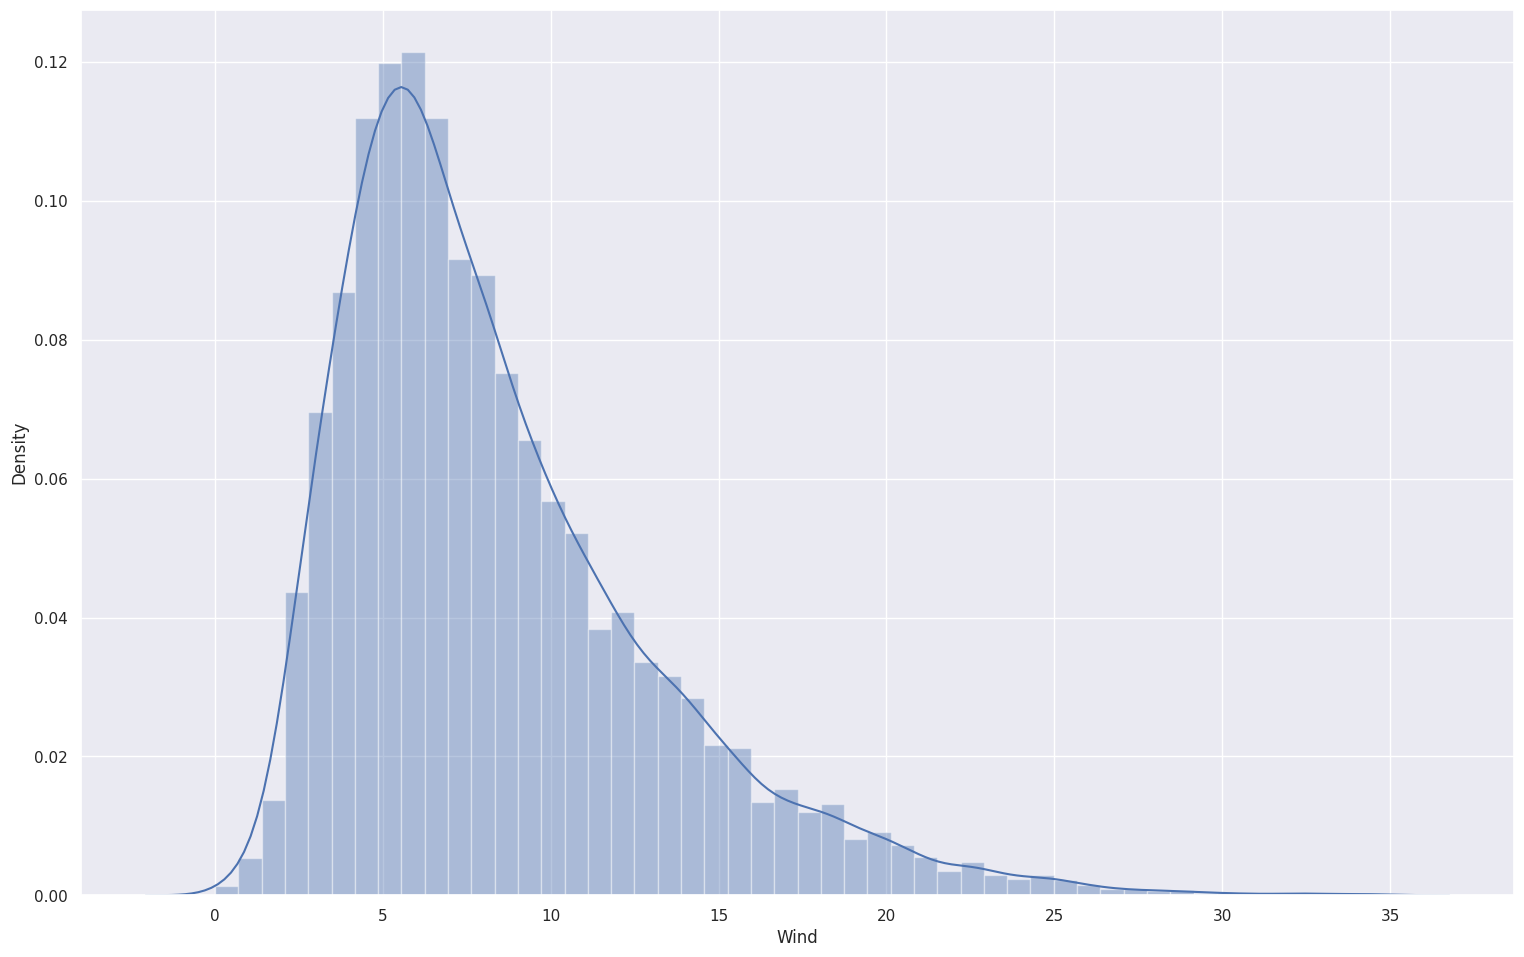

In [ ]:
sns.distplot(data['Wind'])
plt.show()

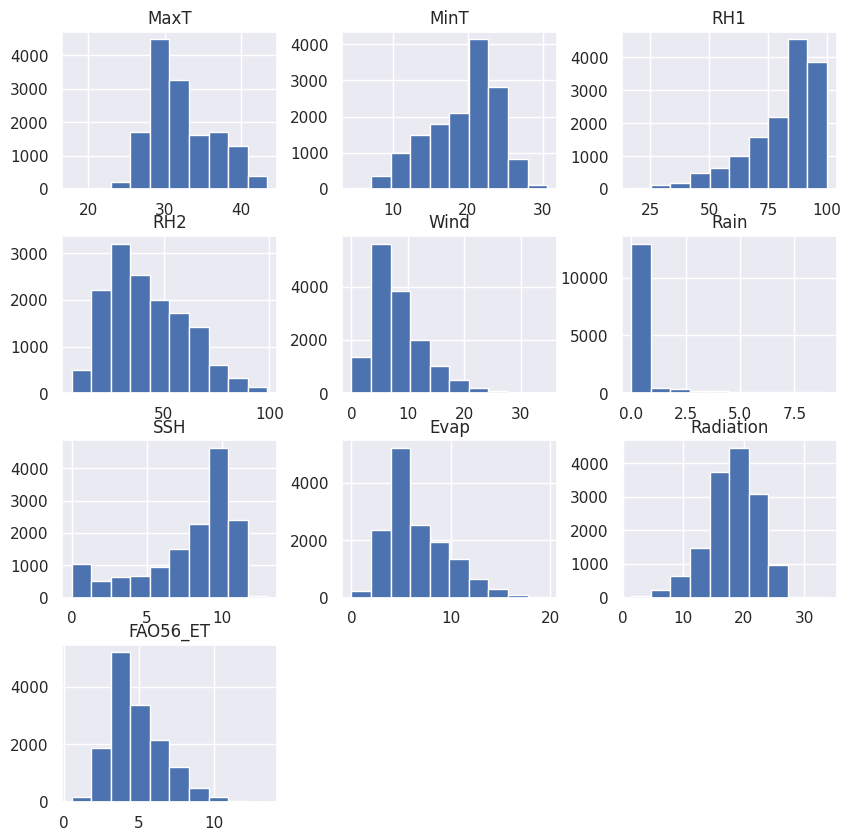

In [ ]:
data.hist(figsize=(10,10))
plt.show()

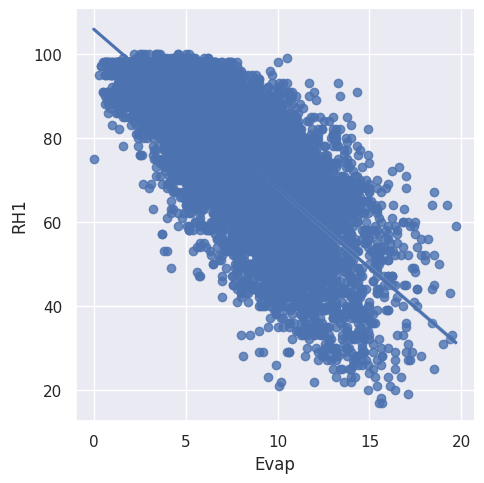

In [ ]:
sns.lmplot(x="Evap", y="RH1", data=data, palette = 'inferno_r', height = 5)

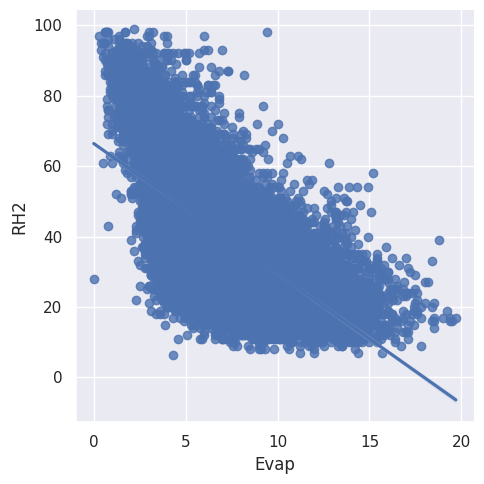

In [ ]:
sns.lmplot(x="Evap", y="RH2", data=data, palette = 'inferno_r', height = 5)

#MODEL FITTING

In [ ]:
X1=data.drop(['Wind'],axis=1)
print(X1)
y1=data['Wind']
print(y1)

       MaxT  MinT  RH1   RH2  Rain   SSH  Evap  Radiation  FAO56_ET
0      28.5  14.2   68  31.0   0.0  10.1   4.3       18.4       3.9
1      28.8  16.0   79  33.0   0.0   9.8   4.8       16.9       3.9
2      29.0  14.5   86  37.0   0.0   9.1   4.6       15.3       3.4
3      29.0  18.0   89  43.0   0.0   9.0   4.2       16.4       3.8
4      27.8  17.0   81  47.0   0.0   8.9   4.3       15.9       4.1
...     ...   ...  ...   ...   ...   ...   ...        ...       ...
15852  39.2  25.2   64  37.0   0.0  12.2   8.8       20.8       7.8
15853  37.8  24.2   81  46.0   0.0  12.0   7.7       19.8       6.8
15854  36.0  25.2   74  46.0   0.0  12.4   6.2       18.5       5.5
15855  38.4  22.6   90  51.0   1.0  12.6   8.5       20.9       6.0
15856  37.0  25.0   77  49.0   0.0  13.0  11.3       22.6       5.7

[14640 rows x 9 columns]
0         5.7
1         6.4
2         5.4
3         7.1
4        10.5
         ... 
15852    13.3
15853    13.5
15854     7.9
15855     8.9
15856     4.9
Name

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming X is a pandas DataFrame and y is a numpy array
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

# Initializing the SelectKBest class
selector = SelectKBest(f_classif, k=6)

# Fitting the selector on the training data and transforming it
X1_train_new = selector.fit_transform(X1_train, y1_train)

# Transforming the testing data
X1_test_new = selector.transform(X1_test)

# Getting the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Getting the names of the selected features
selected_features = X1.columns[feature_indices]

print("Selected features:", selected_features)

Selected features: Index(['MaxT', 'MinT', 'RH1', 'SSH', 'Evap', 'FAO56_ET'], dtype='object')


In [ ]:
X=data.drop(['RH1','Wind','MaxT','FAO56_ET'],axis=1)
print(X)
y=data['Wind']
print(y)

       MinT   RH2  Rain   SSH  Evap  Radiation
0      14.2  31.0   0.0  10.1   4.3       18.4
1      16.0  33.0   0.0   9.8   4.8       16.9
2      14.5  37.0   0.0   9.1   4.6       15.3
3      18.0  43.0   0.0   9.0   4.2       16.4
4      17.0  47.0   0.0   8.9   4.3       15.9
...     ...   ...   ...   ...   ...        ...
15852  25.2  37.0   0.0  12.2   8.8       20.8
15853  24.2  46.0   0.0  12.0   7.7       19.8
15854  25.2  46.0   0.0  12.4   6.2       18.5
15855  22.6  51.0   1.0  12.6   8.5       20.9
15856  25.0  49.0   0.0  13.0  11.3       22.6

[14640 rows x 6 columns]
0         5.7
1         6.4
2         5.4
3         7.1
4        10.5
         ... 
15852    13.3
15853    13.5
15854     7.9
15855     8.9
15856     4.9
Name: Wind, Length: 14640, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.80)

#ML ALGORITHMS

##Linear Regression

In [ ]:
lm2 = LinearRegression()
lm2.fit(X, y)
data['y_pred']=lm2.predict(X)

In [ ]:
from sklearn.model_selection import cross_val_score
lm2.fit(X_train, y_train)
y_predlm = lm2.predict(X_test)

scoreslr=cross_val_score(lm2, X_train, y_train, cv=7)
print("cross-val score=",format(scoreslr.mean()))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predlm))
print("R^2 Score: ",r2_score(y_test, y_predlm))
mapelr = mean_absolute_percentage_error(y_test, y_predlm)
print("MAPE:", mapelr)


cross-val score= 0.4208209622314533
Mean Absolute Error: 2.5790658724103532
R^2 Score:  0.4390026874503786
MAPE: 0.42147299784312836


##KNN

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
y_predkk = knn.predict(X_test)

scoresknn=cross_val_score(knn, X_train, y_train, cv=5)
print("cross-val score=",format(scoresknn.mean()))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predkk))
print("R^2 Score: ",r2_score(y_test, y_predkk))
mapeknn = mean_absolute_percentage_error(y_test, y_predkk)
print("MAPE:", mapeknn)

cross-val score= 0.45516720649285797
Mean Absolute Error: 2.39806693989071
R^2 Score:  0.485435825895688
MAPE: 0.38092165764798713


##SVR

In [ ]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_predsvr = svr.predict(X_test)

#scoressvr=cross_val_score(svr, X_train, y_train, cv=5)
#print("cross-val score=",format(scoressvr.mean()))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predsvr))
print("R^2 Score: ",r2_score(y_test, y_predsvr))
mapesvr = mean_absolute_percentage_error(y_test, y_predsvr)
print("MAPE:", mapesvr)

Mean Absolute Error: 2.526160632327297
R^2 Score:  0.424761277721054
MAPE: 0.39339657057349764


##BOOSTING

Bootstrap Aggregation


In [ ]:
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as metrics
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)
l=bag_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_predbag=l.predict(X_test)

#scoresbt=cross_val_score(l, X_train, y_train, cv=5)
#print("cross-val score=",format(scoresbt.mean()))

In [ ]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predbag))
print("R^2 Score: ",r2_score(y_test, y_predbag))
mapebag = mean_absolute_percentage_error(y_test, y_predbag)
print("MAPE:", mapebag)

Mean Absolute Error: 2.1962177595628414
R^2 Score:  0.5830632077776208
MAPE: 0.3546430686218839


Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_predrr = regressor.predict(X_test)

#scoresrr=cross_val_score(regressor, X_train, y_train, cv=5)
#print("cross-val score=",format(scoresrr.mean()))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predrr))

Mean Absolute Error: 2.229520150273224


In [ ]:
print("R^2 Score: ",r2_score(y_test, y_predrr))
maperr = mean_absolute_percentage_error(y_test, y_predrr)
print("MAPE:", maperr)

R^2 Score:  0.569534484075237
MAPE: 0.3563458590054126


Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3,min_samples_leaf = 10, random_state = 42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

In [ ]:
scoresdt=cross_val_score(regressor, X_train, y_train, cv=5)
print("cross-val score=",format(scoresdt.mean()))

cross-val score= 0.30087799973434726


In [ ]:
y_preddt = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preddt))
print("R^2 Score: ",r2_score(y_test, y_preddt))
mapedt = mean_absolute_percentage_error(y_test, y_preddt)
print("MAPE:", mapedt)

Mean Absolute Error: 2.826716653392061
R^2 Score:  0.34074281649310634
MAPE: 0.4505960283079395


#BOOSTING


Adaptive Boosting

In [ ]:
#Adaboosting
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)
adaclf.fit(X_train,y_train)

scoresab=cross_val_score(adaclf, X_train, y_train, cv=5)
print("cross-val score=",format(scoresab.mean()))

y_predab = adaclf.predict(X_test)
ab=mean_absolute_error(y_test, y_predab)
print('Mean Absolute Error:',ab)
print("R^2 Score: ",r2_score(y_test, y_predab))
mapeab = mean_absolute_percentage_error(y_test, y_predab)
print("MAPE:", mapeab)

cross-val score= 0.36208105264253165
Mean Absolute Error: 2.9051107878463704
R^2 Score:  0.37306751876856215
MAPE: 0.5116507854157472


Gradient Boosting

In [ ]:
#Gradient boosting
regressor1 = GradientBoostingRegressor(max_depth=4,n_estimators=15,learning_rate=0.1,random_state=0)
regressor1.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=15, random_state=0)

In [ ]:
scoresgb=cross_val_score(regressor1, X_train, y_train, cv=5)
print("cross-val score=",format(scoresgb.mean()))

cross-val score= 0.42171887292959076


In [ ]:
y_predgb = regressor1.predict(X_test)
gb=mean_absolute_error(y_test, y_predgb)
print('Mean Absolute Error:',gb)
print("R^2 Score: ",r2_score(y_test, y_predgb))
mapegb = mean_absolute_percentage_error(y_test, y_predgb)
print("MAPE:", mapegb)

Mean Absolute Error: 2.599817089515232
R^2 Score:  0.4465841700093284
MAPE: 0.43245138822019263


Extreme Gradient Boosting

In [ ]:
clf = XGBRegressor(n_estimators=100,
                   learning_rate=0.1,
                   random_state=42)
clf.fit(X_train, y_train)

scoresclf=cross_val_score(clf, X_train, y_train, cv=5)
print("cross-val score=",format(scoresclf.mean()))

y_predxgb = clf.predict(X_test)
xgb=mean_absolute_error(y_test, y_predxgb)
print('Mean Absolute Error:',xgb)
print("R^2 Score: ",r2_score(y_test, y_predxgb))
mapexgb = mean_absolute_percentage_error(y_test, y_predxgb)
print("MAPE:", mapexgb)

cross-val score= 0.560092881688773
Mean Absolute Error: 2.201729422025993
R^2 Score:  0.582222905302596
MAPE: 0.35345813773815443


#RIDGE REGRESSION

In [ ]:
ridge = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_predr = ridge.predict(X_test)
r=mean_absolute_error(y_test, y_predr)

scoresrg=cross_val_score(ridge, X_train, y_train, cv=5)
print("cross-val score=",format(scoresrg.mean()))

print('Mean Absolute Error:',r)
print("R^2 Score: ",r2_score(y_test, y_predr))
maper = mean_absolute_percentage_error(y_test, y_predr)
print("MAPE:", maper)

cross-val score= 0.4209025534632441
Mean Absolute Error: 2.579076808642266
R^2 Score:  0.43900515066911083
MAPE: 0.4214702147953288


#LASSO REGRESSION

In [ ]:
lasso = Lasso(alpha=1.0)  # alpha is the regularization parameter
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
y_predls = lasso.predict(X_test)
l=mean_absolute_error(y_test, y_predls)
print('Mean Absolute Error:',l)
print("R^2 Score: ",r2_score(y_test, y_predls))
mapels = mean_absolute_percentage_error(y_test, y_predls)
print("MAPE:", mapels)

Mean Absolute Error: 3.094972087361302
R^2 Score:  0.2108269723934022
MAPE: 0.5163532825267744


#NEURAL NETWORK

In [ ]:
tf.random.set_seed(42)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(28),
                            tf.keras.layers.Dense(14),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

history= model.fit(X_train, y_train, epochs=250, verbose=0)




In [ ]:
model.evaluate(X_test, y_test)

92/92 [==============================] - 0s 2ms/step - loss: 2.5288 - mae: 2.5288


[2.528829336166382, 2.528829336166382]

In [ ]:
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                196       
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 dense_2 (Dense)             (None, 7)                 105       
                                                                 
 dense_3 (Dense)             (None, 3)                 24        
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 742
Trainable params: 742
Non-trainable pa

In [ ]:
y_pred=model.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
r2

92/92 [==============================] - 0s 1ms/step


0.41354533168944385

#RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.preprocessing import sequence

In [ ]:
max_features = 100
maxlen = 50
batch_size = 32

In [ ]:
# Create a simple RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(maxlen, max_features)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Poisson Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PoissonRegressor

pipeline_poisson = Pipeline([('model', PoissonRegressor())])
pipeline_poisson.fit(X_train, y_train)
y_pred_poisson = pipeline_poisson.predict(X_test)

In [ ]:
pd=mean_absolute_error(y_test, y_pred_poisson)
print('Mean Absolute Error:',pd)
print("R^2 Score: ",r2_score(y_test, y_pred_poisson))
mapepoi = mean_absolute_percentage_error(y_test, y_pred_poisson)
print("MAPE:", mapepoi)

Mean Absolute Error: 2.6105664927527186
R^2 Score:  0.42934369294889696
MAPE: 0.42772032165595286


GRNN